# Unit 1 Capstone School Lunch Participation 1972-2018

### **About my dataset**

I am using the dataset from National School lunch Assistance Program from 1969-2018 from Data.gov, this dataset features the Free Lunch, Reduced Price, Full Price participation along with total Lunches served and the percentage of Free Lunch to Reduced Price. This dataset covers participation nationwide in the school lunch program. You can find more on this dataset __[here](https://catalog.data.gov/dataset/national-school-lunch-assistance-program-participation-and-meals-served-data/resource/77700016-9f95-4652-869a-93f9f6f7a9ea)__ for simplicity sake I have changed the name of the file to lunchbreak.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


lunch_csv = pd.read_csv('lunchbreak.csv')
print(lunch_csv)
    

                                                       \
0                                              Fiscal   
1                                                Year   
2                                                       
3                                                1969   
4                                                1970   
5                                                1971   
6                                                1972   
7                                                1973   
8                                                1974   
9                                                1975   
10                                               1976   
11                                               1977   
12                                               1978   
13                                               1979   
14                                               1980   
15                                               1981   
16                             

In [2]:
lunch_csv.head()


,,-------Average Participation-------,Unnamed: 2,Unnamed: 3,Unnamed: 4,,Unnamed: 6
0,Fiscal,,Reduced,Full,,Total Lunches,Percent Free/RP
1,Year,Free,Price,Price,Total,Served,of Total
2,,----------Millions----------,NaN,NaN,NaN,NaN,%
3,1969,2.9,1],16.5,19.4,"3,368.20",15.1
4,1970,4.6,1],17.8,22.4,"3,565.10",20.7


In [3]:
# Here we are re-organizing the table by dropping the first 4 rows from the table
lunch_csv2 = lunch_csv[5:-4].dropna()
# Below we are renaming the columns
lunch_csv2.columns = ['Year', 'Free_Lunch', 'Reduced_Price', 'Full_Price', 'Total', 'Total_Lunches', 'Percent of Free/RP of Total']


In [4]:
lunch_csv2.head()


,Year,Free_Lunch,Reduced_Price,Full_Price,Total,Total_Lunches,Percent of Free/RP of Total
5,1971,5.8,0.5,17.8,24.1,"3,848.30",26.1
6,1972,7.3,0.5,16.6,24.4,"3,972.10",32.4
7,1973,8.1,0.5,16.1,24.7,"4,008.80",35
8,1974,8.6,0.5,15.5,24.6,"3,981.60",37.1
9,1975,9.4,0.6,14.9,24.9,"4,063.00",40.3


In [5]:
lunch_csv2.shape

(48, 7)

In [6]:
lunch_csv2['Free_Lunch'] = lunch_csv2['Free_Lunch'].astype(float)
lunch_csv2['Year'] = lunch_csv2['Year'].astype(float)
lunch_csv2['Reduced_Price'] = lunch_csv2['Reduced_Price'].astype(float)
lunch_csv2['Full_Price'] = lunch_csv2['Full_Price'].astype(float)
lunch_csv2['Total'] = lunch_csv2['Total'].astype(float)
lunch_csv2['Total_Lunches'] = lunch_csv2['Total_Lunches'].apply(lambda s: float(s.replace(',', '')))
lunch_csv2['Percent of Free/RP of Total'] = lunch_csv2['Percent of Free/RP of Total'].astype(float)

In [7]:
# We are taking the sum of the two columns to generate our A part of our A/B test
lunch_csv2['FL+RP'] = lunch_csv2['Free_Lunch'].astype(float) + lunch_csv2['Reduced_Price'].astype(float)

In [8]:
lunch_csv2.head()


,Year,Free_Lunch,Reduced_Price,Full_Price,Total,Total_Lunches,Percent of Free/RP of Total,FL+RP
5,1971.0,5.8,0.5,17.8,24.1,3848.3,26.1,6.3
6,1972.0,7.3,0.5,16.6,24.4,3972.1,32.4,7.8
7,1973.0,8.1,0.5,16.1,24.7,4008.8,35.0,8.6
8,1974.0,8.6,0.5,15.5,24.6,3981.6,37.1,9.1
9,1975.0,9.4,0.6,14.9,24.9,4063.0,40.3,10.0


## Data Exploration

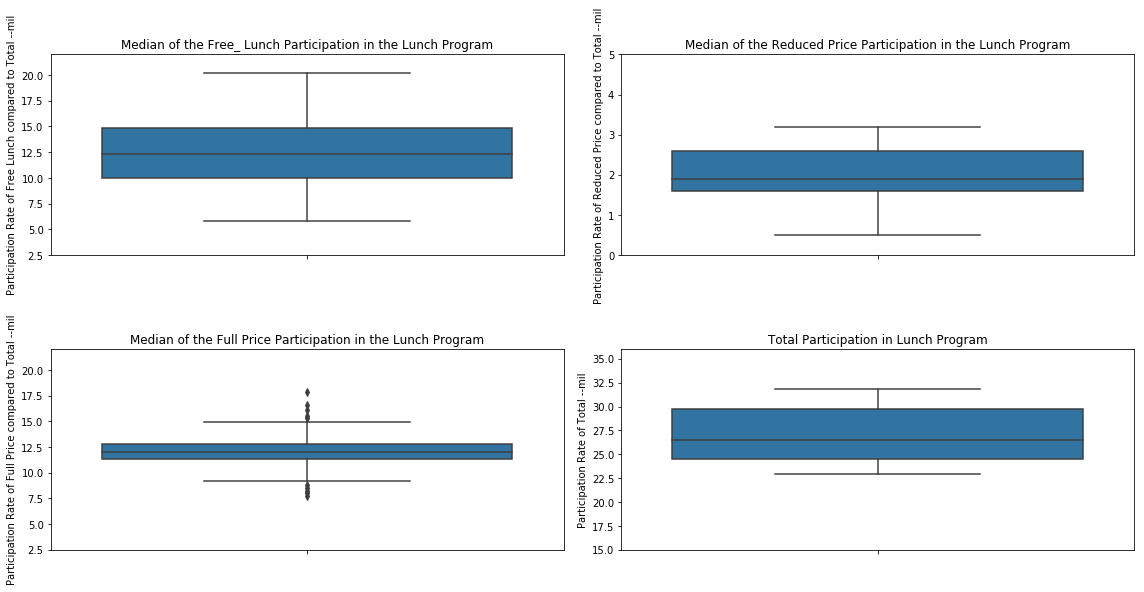

In [37]:
plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
sns.boxplot(y= lunch_csv2.Free_Lunch)
plt.ylim(2.5, 22)
plt.title('Median of the Free_ Lunch Participation in the Lunch Program')
plt.ylabel('Participation Rate of Free Lunch compared to Total --mil')

plt.subplot(3, 2, 2)
sns.boxplot(y= lunch_csv2.Reduced_Price)
plt.ylim(0, 5.0)
plt.title('Median of the Reduced Price Participation in the Lunch Program')
plt.ylabel('Participation Rate of Reduced Price compared to Total --mil')

plt.subplot(3, 2, 3)
sns.boxplot(y= lunch_csv2.Full_Price)
plt.ylim(2.5, 22)
plt.title('Median of the Full Price Participation in the Lunch Program')
plt.ylabel('Participation Rate of Full Price compared to Total --mil')

plt.subplot(3, 2, 4)
sns.boxplot(y= lunch_csv2.Total)
plt.ylim(15, 36)
plt.title('Median of Total Participation in Lunch Program')
plt.ylabel('Participation Rate of Total --mil')

plt.tight_layout()
plt.show()

In [79]:
# type(lunch_csv2['Year'].iat[0]) to identify string or int

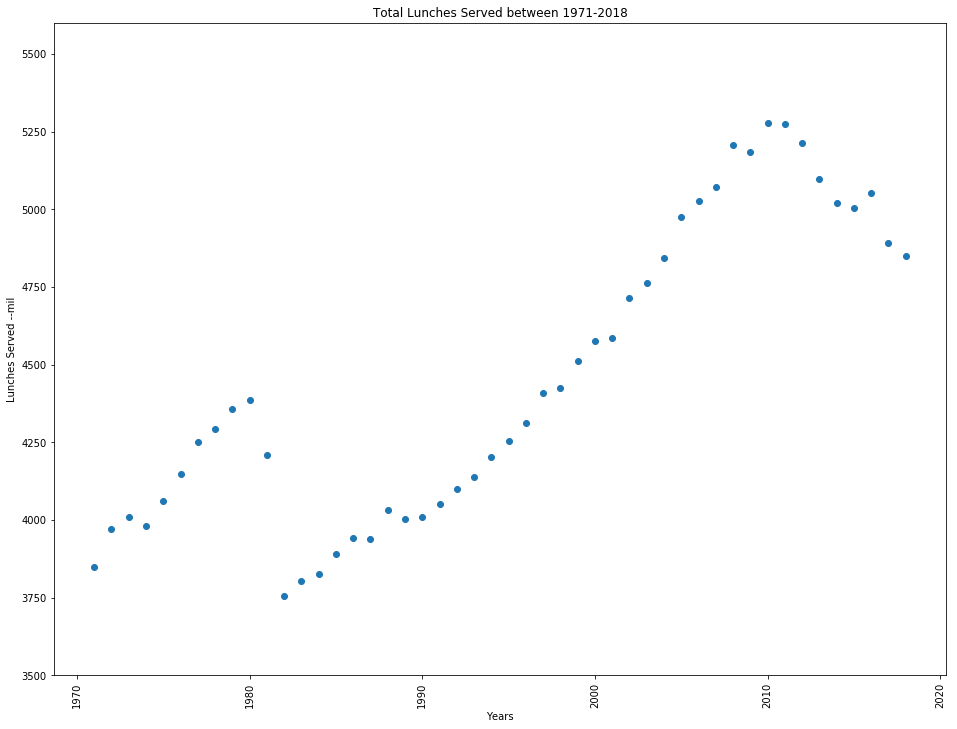

In [36]:
plt.figure(figsize=(16, 12))
plt.scatter(x=lunch_csv2['Year'], y=lunch_csv2['Total_Lunches'])
plt.ylabel('Lunches Served --mil')
plt.ylim(3500,5600)
plt.xticks(rotation = 90)
plt.xlabel('Years')
plt.title('Total Lunches Served between 1971-2018')

plt.show()


C:\Users\purchasing\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


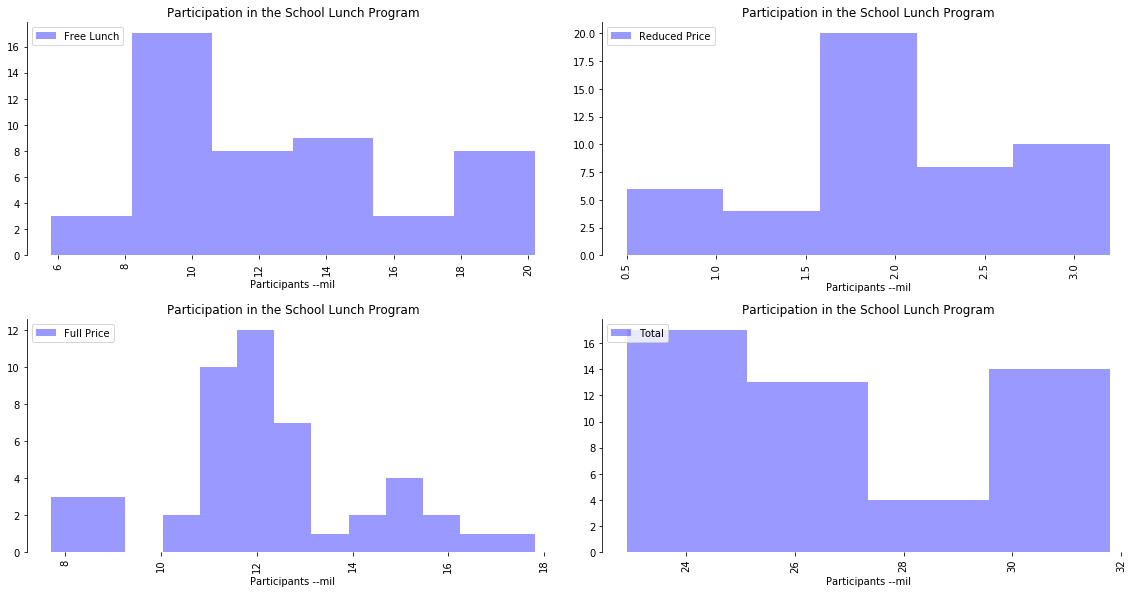

In [74]:
plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
sns.distplot(lunch_csv2['Free_Lunch'], color="b", label="Free Lunch", kde = False)
plt.legend(ncol=2, loc="upper left", frameon=True)
plt.title('Participation in the School Lunch Program')
plt.xlabel("Participants --mil")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 2)
sns.distplot(lunch_csv2['Reduced_Price'], color="b", label="Reduced Price", kde = False)
plt.legend(ncol=2, loc="upper left", frameon=True)
plt.title('Participation in the School Lunch Program')
plt.xlabel("Participants --mil")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 3)
sns.distplot(lunch_csv2['Full_Price'], color="b", label="Full Price", kde = False)
plt.legend(ncol=2, loc="upper left", frameon=True)
plt.title('Participation in the School Lunch Program')
plt.xlabel("Participants --mil")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 4)
sns.distplot(lunch_csv2['Total'], color="b", label="Total", kde = False)
plt.legend(ncol=2, loc="upper left", frameon=True)
plt.title('Participation in the School Lunch Program')
plt.xlabel("Participants --mil")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.tight_layout()
plt.show()

## Process for A/B Testing

Using the Total Participation as the normal in the test and performing two additional tests for the B side of the test. In the B portion of the test we use the Full Price vs. Subsidized Price comparison in the Lunch Program we can see some interesting trending across both groups.  

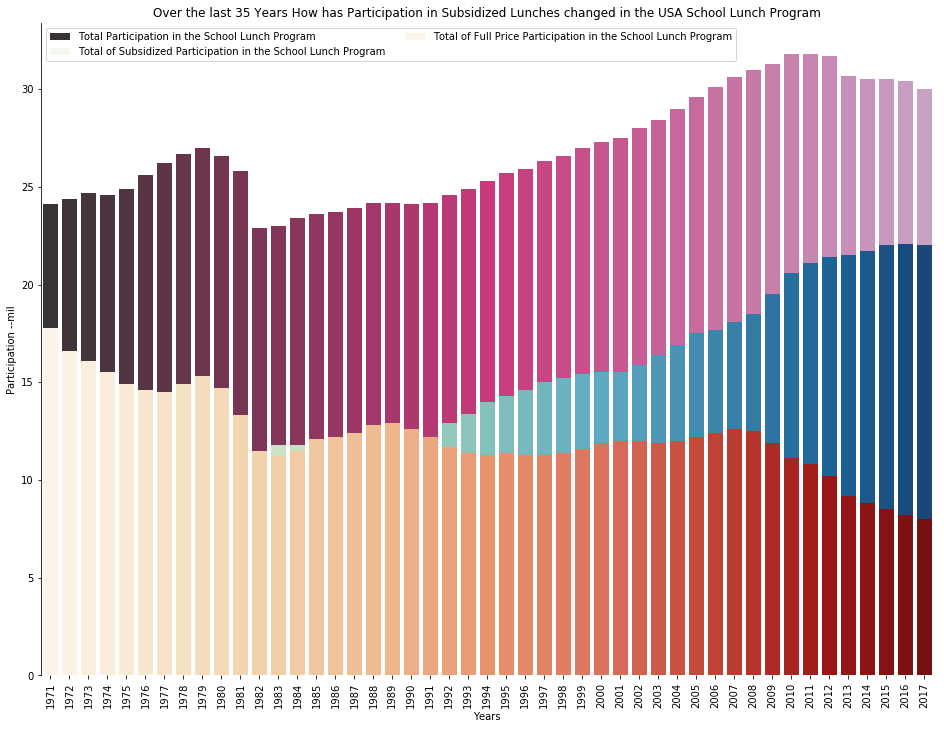

In [67]:
plt.figure(figsize=(16, 12))
sns.barplot(x="Year", y='Total', data=lunch_csv2,
            label="Total Participation in the School Lunch Program", palette='PuRd_d', order=np.arange(1971, 2018))

sns.barplot(x="Year", y='FL+RP', data=lunch_csv2,
            label="Total of Subsidized Participation in the School Lunch Program", palette='GnBu', order=np.arange(1971, 2018))

sns.barplot(x="Year", y='Full_Price', data=lunch_csv2,
            label="Total of Full Price Participation in the School Lunch Program", palette='OrRd', order=np.arange(1971, 2018))

plt.legend(ncol=2, loc="upper left", frameon=True)
plt.title('Over the last 35 Years How has Participation in Subsidized Lunches changed in the USA School Lunch Program')
plt.xlabel("Years")
plt.ylabel("Participation --mil")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)
plt.show()

## The Problem
We have determined that there is strong correlation between Subsidized and Full Price Lunches. They both make up the total of the participation laid out in the above graphs. Influences appear to come mostly from low incomes, but also could be due to nutritional elements of lunch content across the nation.

## My Hypothesis
Within the same household income and with improved nutrition in lunch content should contribute to increased participation in the lunch program. 

## Sampling
Sampling of 10,000 students per state to isolate current nutritional trends of eating for the region. Poll these students over a 5 year timeline to evaluate choices

## Rollout Plan
## 1-2 Years

The plan will start with taking 10% or 1,000 candidates developing testing menus for based on seasonality(group A). The second (group B) will evaluate the current menus of what is being served, the program will evaluate participation in group A and B and  if the numbers in group A increase by 10% more than group B then the program will continue.

## 2-3 years
At the 2 year mark the test group will increase to 30% or 3,000 candidates. following the same guideline with different menus set for Group A and the current menus for Group B. Participation rates in Group A should increase 10% or more for program to continue 

## 3-4 years
At the 3 year mark, the program will introduce the last 60% of the candidates(6,000) to the same guideline. Evaluating the participation rates again for a 10% increase or more in Group A for the program to continue.

## 4-5 years
At the four year mark all of the candidates will given the same menu as group A for evaluation in participation.

## Testing
At the end of the program the all candidates will be given a survey about how they feel about nutrition of different menu items.

## Evaluation Plan
This program will prove successful if after the five year time period, the average participation score if group A participants  20% or higher due to menu selection as oppose to current menus. If the participation levels are above that amount this program will prove to successfully increase high participation and creating a more nutritious meal in the school lunch program.